# Tutorial: Implementation with Scikit-learn: `PolynomialFeatures`

Di subchapter sebelumnya, kita berhasil membuat model kurva dengan merekayasa fitur kuadratik (`x²`) secara manual. Proses ini sangat bagus untuk membangun intuisi, tetapi akan sangat merepotkan jika kita ingin menambahkan pangkat yang lebih tinggi (`x³`, `x⁴`, dst.) atau jika kita memiliki banyak fitur awal.

Scikit-learn menyediakan *transformer* yang sangat kuat bernama **`PolynomialFeatures`** untuk melakukan pekerjaan ini secara otomatis.

**Tujuan:**
1.  Menggunakan `PolynomialFeatures` untuk membuat fitur polinomial.
2.  Memahami parameter penting seperti `degree`.
3.  Mengintegrasikan `PolynomialFeatures` dan `LinearRegression` ke dalam sebuah **`Pipeline`** untuk alur kerja yang bersih dan profesional.


---
### 1. Setup dan Data

Kita akan menggunakan kembali data non-linear yang sama untuk konsistensi.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Set numpy print options untuk format 4 desimal
np.set_printoptions(precision=4, suppress=True)

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Membuat data non-linear yang sama
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

---
### 2. Menggunakan `PolynomialFeatures`

Mari kita lihat bagaimana `PolynomialFeatures` bekerja. Kita akan memintanya untuk membuat fitur polinomial hingga **derajat 2**.


In [22]:
# 1. inisialisasi transformer
# degree ini berhubungan dengan derajat polinomnya, degree = 2 berarti membuat fitur (x¹, x²)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# 2. fit dan transform data X kita
X_poly = poly_features.fit_transform(X)

---
### 3. Menganalisis Hasil Transformasi

Mari kita periksa apa yang telah dibuat oleh `PolynomialFeatures`.


In [23]:
print(f'bentuk X asli: {X.shape}')
print(f'bentuk X poly: {X_poly.shape}')
print(f'\ndata 5 baris pertama X_asli\n {X[:5]}')
print(f'\ndata 5 baris pertama X_poly\n {X_poly[:5]}')

bentuk X asli: (100, 1)
bentuk X poly: (100, 2)

data 5 baris pertama X_asli
 [[-0.7528]
 [ 2.7043]
 [ 1.392 ]
 [ 0.592 ]
 [-2.0639]]

data 5 baris pertama X_poly
 [[-0.7528  0.5666]
 [ 2.7043  7.3132]
 [ 1.392   1.9376]
 [ 0.592   0.3504]
 [-2.0639  4.2596]]


**Analisis:**

Seperti yang Anda lihat, `PolynomialFeatures` telah mengambil `X` asli kita (satu kolom) dan mengubahnya menjadi `X_poly` (dua kolom):
* **Kolom pertama** adalah fitur asli (`X¹`).
* **Kolom kedua** adalah fitur kuadratik (`X²`).

Ini persis sama dengan yang kita lakukan secara manual, tetapi sekarang dilakukan secara otomatis!


---
### 4. Alur Kerja Profesional: Menggunakan `Pipeline`

Cara terbaik untuk menggunakan *transformer* seperti `PolynomialFeatures` adalah dengan merangkainya bersama model dalam sebuah **`Pipeline`**.

**Mengapa `Pipeline`?**
* **Kerapian:** Menggabungkan beberapa langkah (transformasi fitur + pelatihan model) menjadi satu objek.
* **Keamanan:** Mencegah kesalahan umum, seperti lupa menerapkan transformasi yang sama pada data pengujian. Pipeline menanganinya secara otomatis.

Mari kita buat sebuah pipeline yang melakukan dua hal secara berurutan:
1.  Membuat fitur polinomial derajat 2.
2.  Melatih model Regresi Linear pada fitur-fitur baru tersebut.


In [24]:
# membuat pipeline
polynomial_regression_pipeline = Pipeline(
    [
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('lin_reg', LinearRegression())
    ]
)

---
### 5. Melatih dan Menggunakan Pipeline

Sekarang kita memiliki satu objek `pipeline` yang mewakili seluruh model kita. Kita bisa melatihnya hanya dengan satu perintah `.fit()`.


In [25]:
polynomial_regression_pipeline.fit(X,Y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly_features', ...), ('lin_reg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",2
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06


---
### 6. Visualisasi Hasil dari Pipeline

Mari kita buat prediksi dan lihat hasilnya. Pipeline akan secara otomatis menangani transformasi data baru sebelum membuat prediksi.

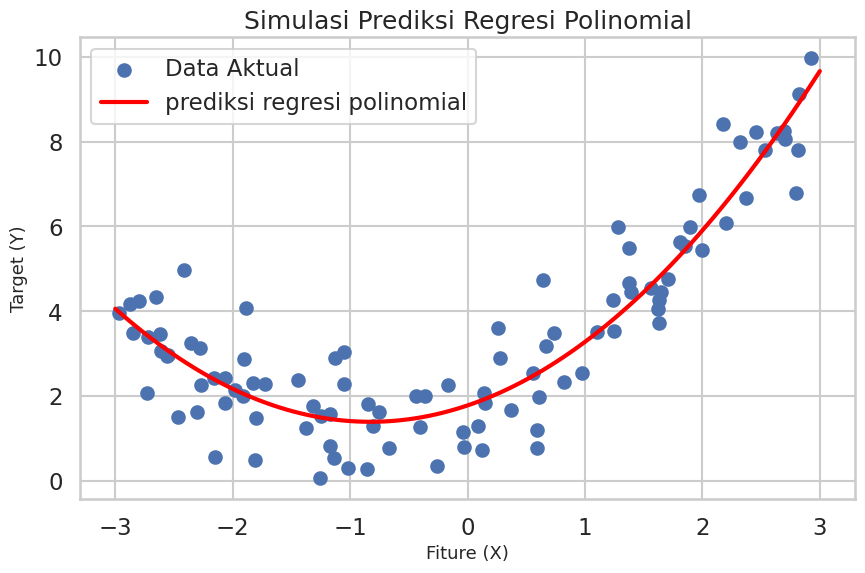

In [26]:
X_new = np.linspace(-3,3,100).reshape(100, 1)
Y_pred_pipeline = polynomial_regression_pipeline.predict(X_new)

plt.figure(figsize=(10,6))
plt.scatter(X,Y,label='Data Aktual')
plt.plot(X_new,Y_pred_pipeline,color='red',linewidth=3,label='prediksi regresi polinomial')
plt.legend()
plt.title('Simulasi Prediksi Regresi Polinomial')
plt.xlabel('Fiture (X)', fontsize=13)
plt.ylabel('Target (Y)', fontsize=13)
plt.show()

---
Hasilnya identik dengan metode manual kita, tetapi alur kerjanya jauh lebih bersih, lebih efisien, dan lebih profesional.

### Kesimpulan

* **`PolynomialFeatures`** adalah alat standar untuk membuat fitur polinomial di Scikit-learn.
* Menggabungkannya dengan `LinearRegression` di dalam sebuah **`Pipeline`** adalah praktik terbaik. Ini menyederhanakan kode Anda dan memastikan bahwa transformasi data diterapkan secara konsisten pada data pelatihan dan pengujian.

**Selanjutnya:**
Kita telah melihat bagaimana `degree=2` bekerja dengan baik. Tapi, apa yang terjadi jika kita memilih derajat yang lebih tinggi, seperti `degree=10` atau `degree=30`? Di subchapter berikutnya, kita akan menjelajahi bahaya **overfitting**.